In [2]:
from pytadbit import load_hic_data_from_reads

In [4]:
reso = 300000

In [5]:
hic_data1 = load_hic_data_from_reads('results/HindIII/03_filtering/valid_reads12_HindIII.tsv', resolution=reso)

In [6]:
hic_data1.normalize_hic()

iterative correction
  - copying matrix
  - computing baises
rescaling to factor 1
  - getting the sum of the matrix
    => 11709.348
  - rescaling biases


In [7]:
hic_data2 = load_hic_data_from_reads('results/MboI/03_filtering/valid_reads12_MboI.tsv', resolution=reso)

In [8]:
hic_data2.normalize_hic()

iterative correction
  - copying matrix
  - computing baises
rescaling to factor 1
  - getting the sum of the matrix
    => 11340.756
  - rescaling biases


In [10]:
hic_data = load_hic_data_from_reads('results/both/03_filtering/valid_reads12.tsv', resolution=reso)

In [11]:
hic_data.normalize_hic()

iterative correction
  - copying matrix
  - computing baises
rescaling to factor 1
  - getting the sum of the matrix
    => 11770.466
  - rescaling biases


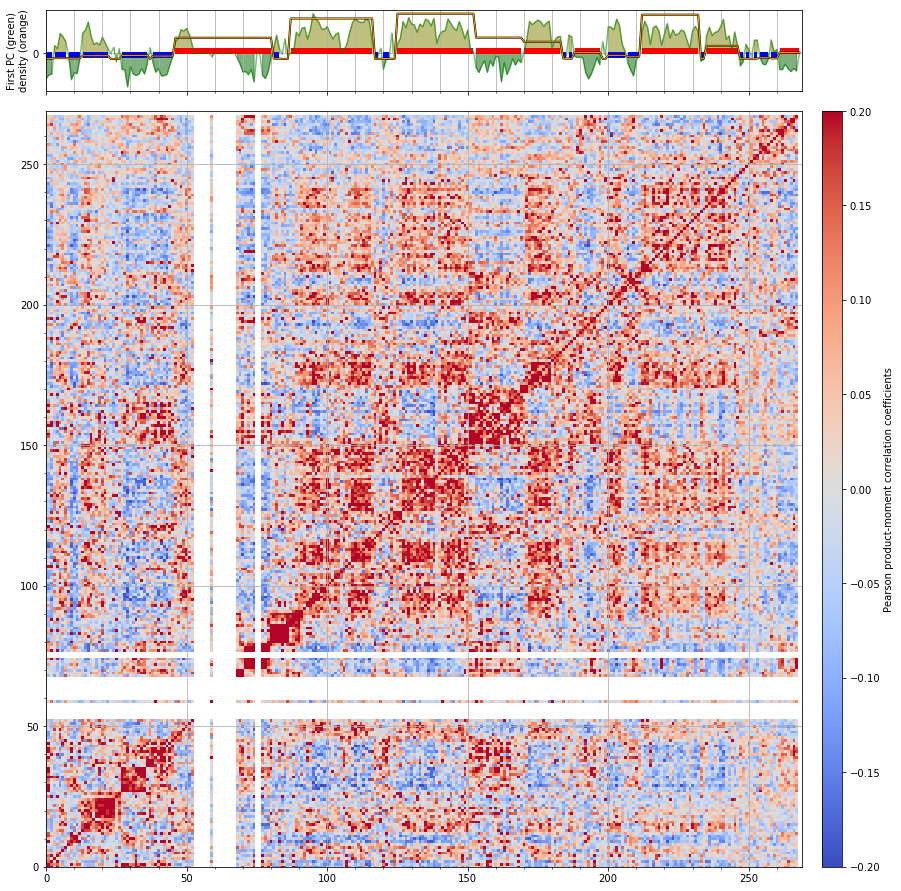

ValueError: list.remove(x): x not in list

{'chr18': [[-0.081888111507217073,
   -0.071036889807485681,
   -0.068068269297007503,
   0.025106641239439155,
   0.015439720764691751,
   0.06436506670247831,
   0.053922712166178076,
   0.037333795395298214,
   -0.0078276564254936599,
   -0.086172495395762216,
   -0.062398018720260504,
   -0.06685085745094238,
   -0.017055839120756571,
   0.065347313463119436,
   0.07624422413372417,
   0.10207404710495825,
   0.055636198699415558,
   0.028392352062011274,
   0.034492246185140255,
   0.026988241516161669,
   0.052193992637787762,
   0.034403132125595114,
   0.014770553660630152,
   -0.00079336759500879496,
   0.018916943615998629,
   -0.027141694491228448,
   0.014945477629151384,
   -0.052609777716789159,
   -0.054097132340415591,
   -0.11001790517433291,
   -0.043700030431959233,
   -0.067293933180097451,
   -0.072616478521336777,
   -0.06864207463626594,
   -0.050702637713482372,
   -0.067751924744689315,
   -0.034239852153351139,
   0.017978149985738632,
   -0.029517046219785334

In [15]:
hic_data.find_compartments(crms=['chr18'], show=True, vmin=-0.2, vmax=0.2, savedata='results/both/compartments.tsv')

In [16]:
! head results/both/compartments.tsv

## CHR chr18	Eigenvector: 1
#start	end	density	type
chr18	0	2	0.05	
chr18	3	7	0.14	
chr18	8	12	0.12	
chr18	13	22	0.57	
chr18	23	23	0.00	
chr18	24	24	0.01	
chr18	25	25	0.01	
chr18	26	26	0.01	


In [17]:
from pytadbit import Chromosome

In [18]:
crm= Chromosome('chr18')

In [20]:
crm.add_experiment('MboI',resolution=100000, hic_data='/media/storage/Notebooks2/fransua/results/MboI/04_normalizing/100000_raw/chr18.mat',
                  norm_data='/media/storage/Notebooks2/fransua/results/MboI/04_normalizing/100000_norm/chr18.mat')

/home/student/.miniconda2/lib/python2.7/site-packages/pytadbit/parsers/hic_parser.py:247: UserWarning: WARNING: matrix not symmetric: summing cell_ij with cell_ji
  warn('WARNING: matrix not symmetric: summing cell_ij with cell_ji')


In [21]:
crm.add_experiment('HindIII',resolution=100000, hic_data='/media/storage/Notebooks2/fransua/results/HindIII/04_normalizing/100000_raw/chr18.mat',
                  norm_data='/media/storage/Notebooks2/fransua/results/HindIII/04_normalizing/100000_norm/chr18.mat')

In [22]:
print crm

Chromosome chr18:
   2  experiments loaded: MboI, HindIII
   0  alignment loaded: 
   species         : UNKNOWN
   assembly version: UNKNOWN



In [23]:
crm.find_tad(['HindIII', 'MboI'], n_cpus=2)

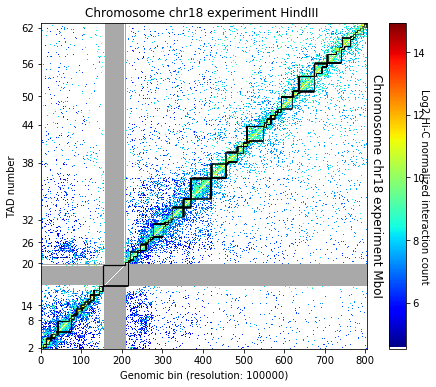

In [24]:
crm.visualize([('HindIII', 'MboI')], normalized=True, paint_tads=True,)

In [33]:
ali=crm.align_experiments(randomize=True, rnd_num = 100)

In [34]:
ali, pvals = ali

In [35]:
pvals

(0.43670886075949367, 0.0, 0.8387096774193549, 0.8245614035087719)

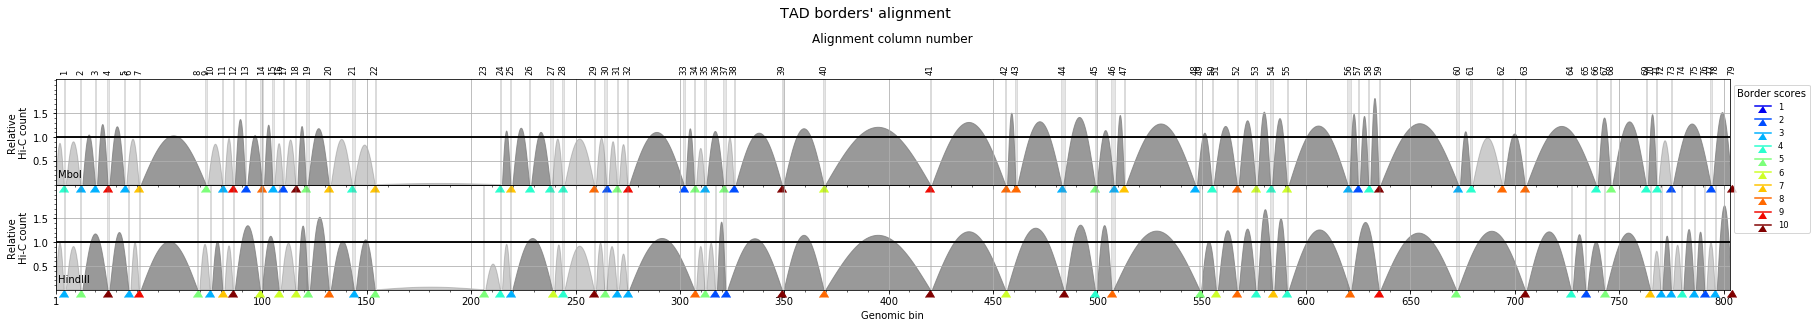

In [36]:
ali.draw ()